<a href="https://colab.research.google.com/github/Aniaannaan/ObliczeniaNaukowe/blob/main/Lab9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

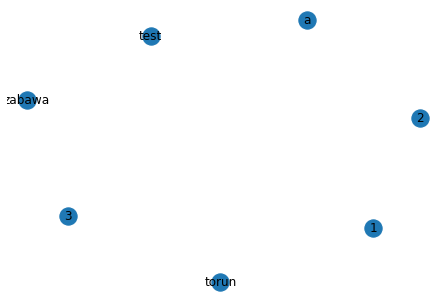

In [6]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
G=nx.Graph() # stworzenie obiektu graf
G.add_node('a') #wierzchołek 
G.add_node(1,weight=5)
G.add_nodes_from(['test','zabawa','torun',2,3])
#nx.draw(G) #same punkty lub można nx.drwa_network(G)
nx.draw(G,with_labels=True) #podpisane wierzchołki

In [7]:
G.nodes #podejrzenie wierzchołków, to nie jest lista

NodeView(('a', 1, 'test', 'zabawa', 'torun', 2, 3))

In [8]:
list(G.nodes) #lista wierzchołków

['a', 1, 'test', 'zabawa', 'torun', 2, 3]

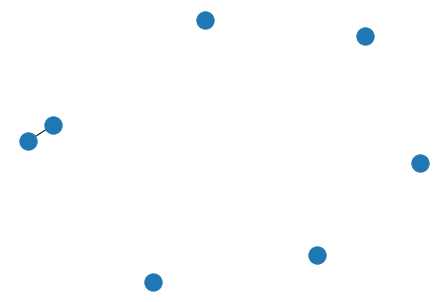

In [10]:
G.add_edge('a',1) #dodawanie krawędzi
nx.draw(G)

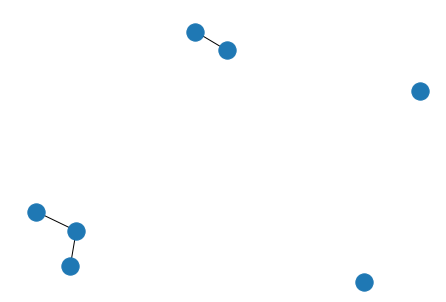

In [11]:
G.add_edges_from([('test','torun'),(1,3)])
nx.draw(G)

In [12]:
H=nx.Graph([(1,2),(22,33),(11,33)])
H.edges

EdgeView([(1, 2), (22, 33), (33, 11)])

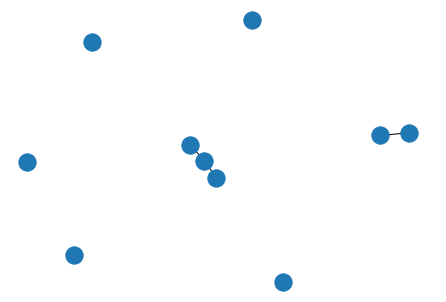

In [14]:
H.add_nodes_from(G)
nx.draw(H)

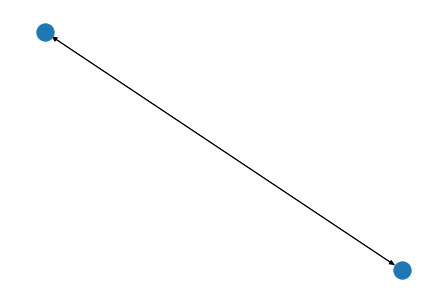

In [19]:
D=nx.DiGraph()
D.add_edges_from([('a','n'),('n','a')])
nx.draw(D)


In [23]:
import requests
import json
data=requests.get('https://raw.githubusercontent.com/danio2010/ON2022/main/tokyo-metro.json').json()

In [24]:
type(data)

dict

In [30]:
data['F']['transfers']

[['F1', 'Y1'],
 ['F2', 'Y2'],
 ['F3', 'Y3'],
 ['F4', 'Y4'],
 ['F5', 'Y5'],
 ['F6', 'Y6'],
 ['F7', 'Y7'],
 ['F8', 'Y8'],
 ['F9', 'Y9'],
 ['F9', 'M25'],
 ['F13', 'M9'],
 ['F15', 'C3'],
 ['F16', 'Z1'],
 ['F16', 'G1']]

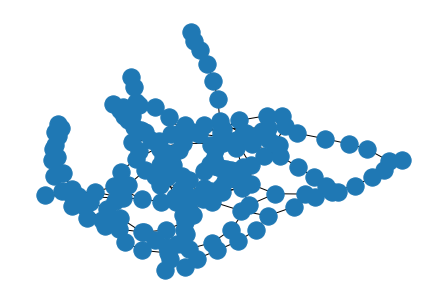

In [44]:
metro=nx.Graph()
przesiadki=[]
for linia in data.values():
  przesiadki.extend(linia['transfers'])
polaczenia=[]
for linia in data.values():
  polaczenia.extend(linia['travel_times'])
metro.add_weighted_edges_from(polaczenia,transfer=False) #dodwanie krawedzi wazonych
metro.add_edges_from(przesiadki,transfer=True) #dodanie krawedzi 
nx.draw(metro)

In [38]:
metro.number_of_edges()

184

In [39]:
metro.number_of_nodes()

184

In [45]:
metro.adj #lista sąsiedztwa

AdjacencyView({'C1': {'C2': {'transfer': False, 'weight': 2}}, 'C2': {'C1': {'transfer': False, 'weight': 2}, 'C3': {'transfer': False, 'weight': 2}}, 'C3': {'C2': {'transfer': False, 'weight': 2}, 'C4': {'transfer': False, 'weight': 1}, 'F15': {'transfer': True}}, 'C4': {'C3': {'transfer': False, 'weight': 1}, 'C5': {'transfer': False, 'weight': 2}, 'Z2': {'transfer': True}, 'G2': {'transfer': True}}, 'C5': {'C4': {'transfer': False, 'weight': 2}, 'C6': {'transfer': False, 'weight': 2}}, 'C6': {'C5': {'transfer': False, 'weight': 2}, 'C7': {'transfer': False, 'weight': 2}}, 'C7': {'C6': {'transfer': False, 'weight': 2}, 'C8': {'transfer': False, 'weight': 1}, 'M14': {'transfer': True}, 'N6': {'transfer': True}, 'G6': {'transfer': True}}, 'C8': {'C7': {'transfer': False, 'weight': 1}, 'C9': {'transfer': False, 'weight': 3}, 'M15': {'transfer': True}, 'H6': {'transfer': True}}, 'C9': {'C8': {'transfer': False, 'weight': 3}, 'C10': {'transfer': False, 'weight': 1}, 'H7': {'transfer': Tru

In [49]:
metro.adj['C1']

AtlasView({'C2': {'transfer': False, 'weight': 2}})

In [54]:
kolory=[data[stacja[0].upper()]['color'] for stacja in metro.nodes()]

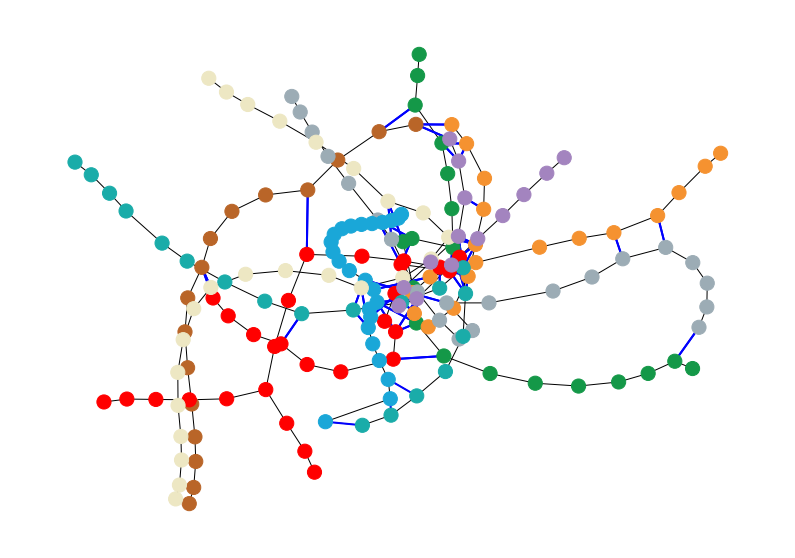

In [60]:
fig,osie=plt.subplots(1,1,figsize=(14,10))
pos_s=nx.spring_layout(metro)
pos_sh=nx.shell_layout(metro)
pos_c=nx.circular_layout(metro)
pos_sp=nx.spectral_layout(metro)
pozycje=pos_s

nx.draw(metro,pos=pozycje,ax=osie,node_size=200,node_color=kolory)
nx.draw_networkx_edges(metro,pos=pozycje,edgelist=przesiadki,width=2,edge_color='blue')

In [61]:
metro.degree()

DegreeView({'C1': 1, 'C2': 2, 'C3': 3, 'C4': 4, 'C5': 2, 'C6': 2, 'C7': 5, 'C8': 4, 'C9': 4, 'C10': 2, 'C11': 5, 'C12': 3, 'C13': 2, 'C14': 2, 'C15': 2, 'C16': 2, 'C17': 2, 'C18': 3, 'C19': 1, 'G1': 3, 'G2': 4, 'G3': 2, 'G4': 3, 'G5': 6, 'G6': 5, 'G7': 2, 'G8': 2, 'G9': 4, 'G10': 2, 'G11': 3, 'G12': 3, 'G13': 2, 'G14': 2, 'G15': 3, 'G16': 3, 'G17': 2, 'G18': 2, 'G19': 1, 'F1': 2, 'F2': 3, 'F3': 3, 'F4': 3, 'F5': 3, 'F6': 3, 'F7': 3, 'F8': 3, 'F9': 4, 'F10': 2, 'F11': 2, 'F12': 2, 'F13': 3, 'F14': 2, 'F15': 3, 'F16': 3, 'H1': 1, 'H2': 2, 'H3': 2, 'H4': 2, 'H5': 2, 'H6': 4, 'H7': 4, 'H8': 4, 'H9': 2, 'H10': 2, 'H11': 2, 'H12': 3, 'H13': 2, 'H14': 2, 'H15': 2, 'H16': 3, 'H17': 3, 'H18': 2, 'H19': 2, 'H20': 2, 'H21': 2, 'M1': 1, 'M2': 2, 'M3': 2, 'M4': 2, 'M5': 2, 'M6': 3, 'M7': 2, 'M8': 2, 'M9': 3, 'M10': 2, 'M11': 2, 'M12': 3, 'M13': 6, 'M14': 5, 'M15': 4, 'M16': 4, 'M17': 2, 'M18': 5, 'M19': 3, 'M20': 2, 'M21': 2, 'M22': 3, 'M23': 2, 'M24': 2, 'M25': 3, 'm3': 1, 'm4': 2, 'm5': 2, 'N1': 

In [62]:
d_max=max(d for (n,d) in metro.degree())
d_max

6

In [64]:
for (n,d) in metro.degree():
  if d==d_max:
    print(n)

G5
M13
N7
Y16
Z4


In [65]:
for (n,d) in metro.degree():
  if d==1:
    print(n)

C1
C19
G19
H1
M1
m3
N19
T24
Y24
Z14


In [71]:
nx.shortest_path(metro,'C5','Y3')

['C5',
 'C4',
 'C3',
 'F15',
 'F14',
 'F13',
 'F12',
 'F11',
 'F10',
 'F9',
 'Y9',
 'Y8',
 'Y7',
 'Y6',
 'Y5',
 'Y4',
 'Y3']